<a href="https://colab.research.google.com/github/MarcelahCaetanoh/Projeto-1-Jornada-DS/blob/main/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os 


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [4]:
import pandas as pd
from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_enem = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/enem_2019_amostra_10.parquet')
df_enem.shape

(509527, 136)

In [6]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,190005708034,2019,2305506,Iguatu,23,CE,22.00,F,1,3,1,2305506.00,Iguatu,23.00,CE,1,3,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305506,Iguatu,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,190003326900,2019,3548500,Santos,35,SP,19.00,F,1,1,1,3548500.00,Santos,35.00,SP,1,1,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3548500,Santos,35,SP,1,1,1,1,503.00,508.00,512.00,515.00,543.90,527.70,545.30,513.90,ACDDCEDEDCCBCBBBBAACECADABAEBBDEEACCECBBCBDDC,ACAABDBEEAABDCCAACBEEDCBDEDBBCCCBCEBDDCABCCBB,BBEEA99999DEEBECBBCACDEAABEEBBECEBAAEDCBECADCE...,EBBADECCAEBBCDECCAEBCABDBCDEBBADBDCABAEBDCCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,190004261548,2019,3552106,Socorro,35,SP,16.00,F,1,1,1,3552106.00,Socorro,35.00,SP,3,0,1,NaN,1,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552106,Socorro,35,SP,1,1,1,1,504.00,509.00,514.00,516.00,406.10,521.20,549.20,510.50,ADCAEDAEADACDCBACEDEABCEBBAEBABBACEEDEACAABCD,ADACCCACDBAABBBDBAEABCCEACAABDEBAECAEDAEDAACE,99999ABCABBAEBCDEDEBDAADCEDCDECBDBDBBECAEDCCBC...,BECACAABACBCABCACDACBDCCDACAAEBCECAECEBCAECEE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,190001849598,2019,3541000,Praia Grande,35,SP,22.00,M,1,1,1,3541000.00,Praia Grande,35.00,SP,1,5,1,1.00,0,NaN,NaN,None,N

In [7]:
len(df_enem['NU_INSCRICAO'].unique())

509527

In [8]:
df_enem.dtypes

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

In [9]:
colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [10]:
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [11]:
colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipios

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [12]:
colunas_questoes + colunas_codigos + colunas_municipios

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [13]:
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + ['NU_INSCRICAO' , 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis =1)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [14]:
df_enem.shape

(509527, 109)

In [ ]:
df_enem.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,509519.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,287993.00,509527.00,114894.00,114894.00,114894.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,371475.00,392613.00,392613.00,371475.00,509527.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,509527.00
mean,22.10,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.77,0.77,0.73,477.66,507.25,520.46,522.92,0.52,1.14,120.49,122.73,114.82,121.66,91.60,571.30,3.87
std,7.47,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.04,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.00,0.04,0.01,0.01,0.03,0.04,0.04,0.03,0.01,0.05,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.44,0.42,0.42,0.44,76.00,82.22,64.02,108.94,0.50,0.79,33.40,42.93,40.17,38.14,59.45,188.74,1.48
min,12.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,18.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,417.80,448.00,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,19.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [15]:
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
colunas_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [17]:
colunas_notas = [ coluna for coluna in colunas_notas if 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [ ]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])

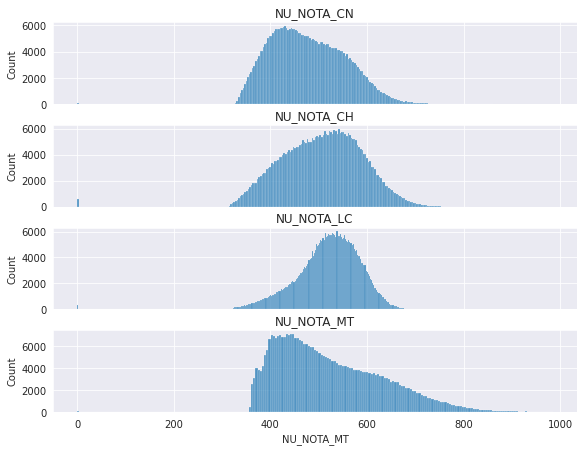

In [18]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

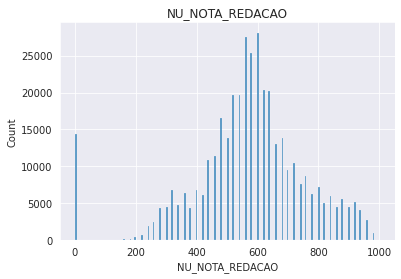

In [19]:
sns.histplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

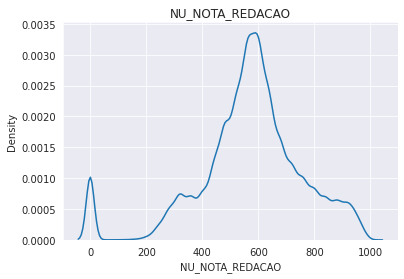

In [20]:
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

In [21]:
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [22]:
df_enem = df_enem.reset_index(drop=True)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [23]:
df_enem['NU_IDADE'].value_counts()

18.00    86634
17.00    84619
19.00    57786
20.00    41133
16.00    31369
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
15.00     7824
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
14.00      529
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
67.00       63
66.00       55
68.00       35
69.00       31
70.00       27
13.00       23
71.00       18
72.00       12
74.00       10
73.00        8
75.00        7
12.00        6
80.00        5
78.00        5
76.00     

In [24]:
df_enem['NU_IDADE'].value_counts().sort_index()

12.00        6
13.00       23
14.00      529
15.00     7824
16.00    31369
17.00    84619
18.00    86634
19.00    57786
20.00    41133
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
66.00       55
67.00       63
68.00       35
69.00       31
70.00       27
71.00       18
72.00       12
73.00        8
74.00       10
75.00        7
76.00        3
77.00        1
78.00     

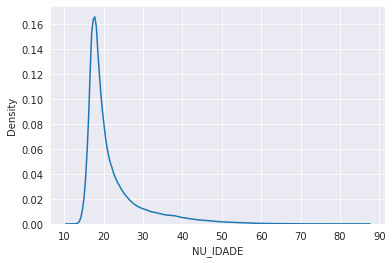

In [25]:
sns.kdeplot(data=df_enem, x ='NU_IDADE')

In [26]:
df_enem['TP_SEXO'].value_counts()

F    303139
M    206388
Name: TP_SEXO, dtype: int64

In [27]:
df_enem['TP_SEXO'].value_counts(normalize=True) * 100

F   59.49
M   40.51
Name: TP_SEXO, dtype: float64

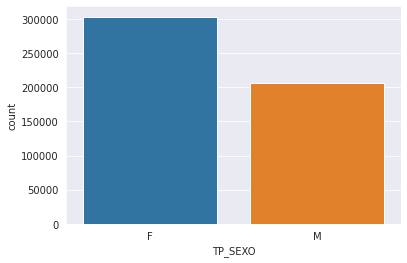

In [28]:
sns.countplot(data=df_enem, x= 'TP_SEXO')

In [29]:
df_enem['TP_ESTADO_CIVIL']. value_counts().sort_index()

0     20345
1    439950
2     39834
3      8763
4       635
Name: TP_ESTADO_CIVIL, dtype: int64

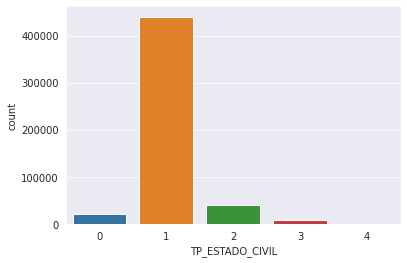

In [30]:
sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL')

In [31]:
df_enem['TP_COR_RACA']. value_counts().sort_index()

0     10446
1    183179
2     64694
3    236369
4     11616
5      3223
Name: TP_COR_RACA, dtype: int64

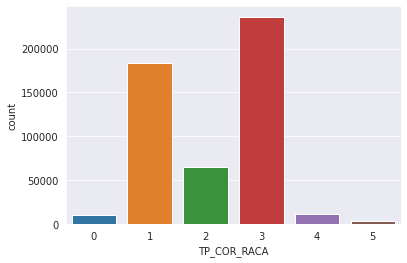

In [32]:
sns.countplot(data=df_enem, x='TP_COR_RACA')

In [33]:
ufs = df_enem['SG_UF_RESIDENCIA']. value_counts().sort_index()
ufs

AC     3955
AL     9283
AM    11737
AP     4319
BA    39880
CE    29581
DF     9485
ES    10239
GO    17074
MA    22157
MG    53702
MS     7057
MT     8757
PA    27861
PB    14891
PE    27051
PI    12134
PR    20829
RJ    34042
RN    11781
RO     5804
RR     1283
RS    21989
SC    10896
SE     7714
SP    81333
TO     4693
Name: SG_UF_RESIDENCIA, dtype: int64

In [34]:
df_ufs = pd.DataFrame({'uf':  ufs.index, 'candidatos' : ufs.values})
df_ufs.head()

,uf,candidatos
0,AC,3955
1,AL,9283
2,AM,11737
3,AP,4319
4,BA,39880


In [35]:
import plotly.express as px

fig = px.treemap(data_frame=df_ufs,
path = ['uf'],
values = 'candidatos'
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict( t=50, l=25, r=25, b=25))
fig.show()


In [36]:
df_enem['Q001']. value_counts().sort_index()

A     29079
B    113489
C     72236
D     58789
E    130900
F     37494
G     22957
H     44583
Name: Q001, dtype: int64

In [37]:
len( df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]

0.0874987979047234

In [38]:
df_enem['Q002']. value_counts().sort_index()

A     19580
B     85678
C     68403
D     67117
E    162963
F     51384
G     39806
H     14596
Name: Q002, dtype: int64

In [39]:
len( df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]

0.028646175766936788

In [40]:
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B,False,False
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B,True,True
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B,False,False
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B,False,False


In [41]:
df_enem['pai_possui_superior']. value_counts(normalize=True) * 100

False   88.14
True    11.86
Name: pai_possui_superior, dtype: float64

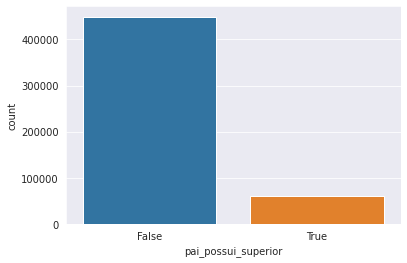

In [42]:
sns.countplot(data=df_enem, x='pai_possui_superior')

In [43]:
df_enem['mae_possui_superior']. value_counts(normalize=True) * 100

False   82.10
True    17.90
Name: mae_possui_superior, dtype: float64

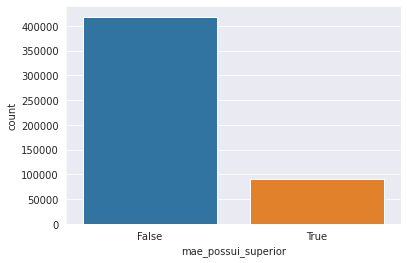

In [44]:
sns.countplot(data=df_enem, x='mae_possui_superior')

In [45]:

from string import ascii_uppercase
dicionario_renda = dict()

In [46]:

from string import ascii_uppercase
dicionario_renda = dict()


for i, letra in enumerate(ascii_uppercase):
     if i == 17:
        break
     dicionario_renda[letra] = i
dicionario_renda    

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [47]:
df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda_familiar
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False,1
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B,False,False,8
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B,True,True,8
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B,False,False,5
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B,False,False,6


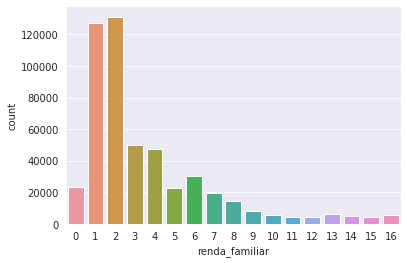

In [48]:
sns.countplot(data=df_enem, x='renda_familiar')

In [49]:
df_sexo =df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,F
1,543.90,527.70,545.30,513.90,680.00,F
2,406.10,521.20,549.20,510.50,480.00,F
3,520.50,488.00,549.20,599.40,500.00,M
4,577.10,587.00,610.70,747.00,780.00,M


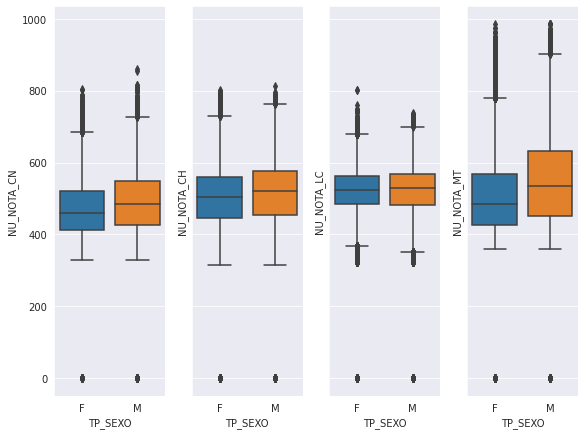

In [50]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i])
   

In [51]:
df_raca =df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,3
1,543.90,527.70,545.30,513.90,680.00,1
2,406.10,521.20,549.20,510.50,480.00,1
3,520.50,488.00,549.20,599.40,500.00,1
4,577.10,587.00,610.70,747.00,780.00,1


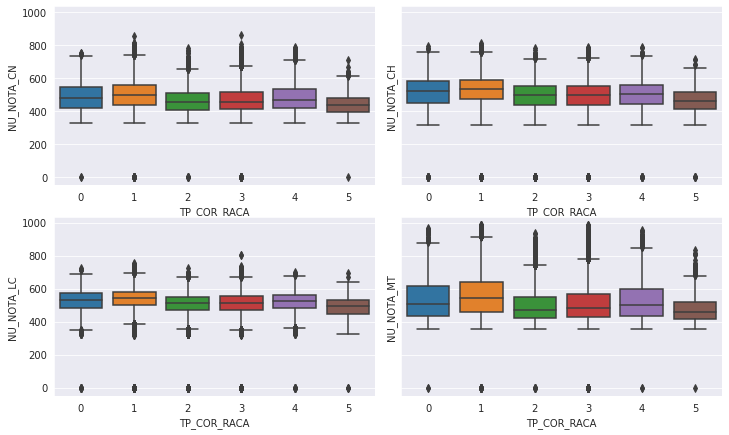

In [52]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2+1]
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

In [53]:
df_instrucao_pais =df_enem.loc[:, colunas_notas + ['pai_possui_superior' , 'mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,543.90,527.70,545.30,513.90,680.00,False,False
2,406.10,521.20,549.20,510.50,480.00,True,True
3,520.50,488.00,549.20,599.40,500.00,False,False
4,577.10,587.00,610.70,747.00,780.00,False,False


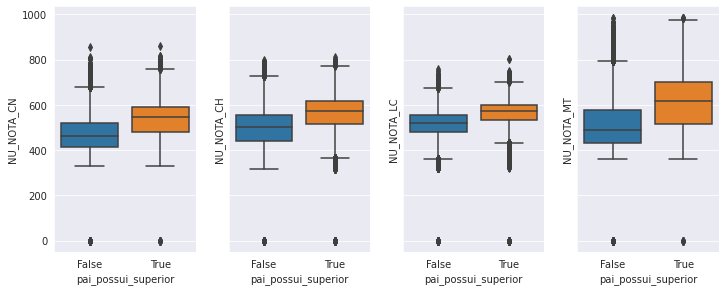

In [54]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

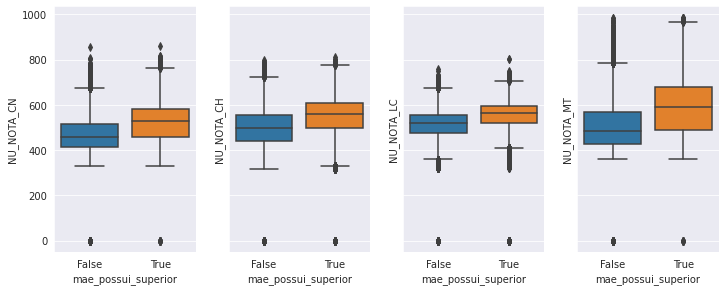

In [55]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

In [56]:
df_idade =df_enem.loc[:, colunas_notas + ['NU_IDADE']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,3
1,543.90,527.70,545.30,513.90,680.00,1
2,406.10,521.20,549.20,510.50,480.00,1
3,520.50,488.00,549.20,599.40,500.00,1
4,577.10,587.00,610.70,747.00,780.00,1


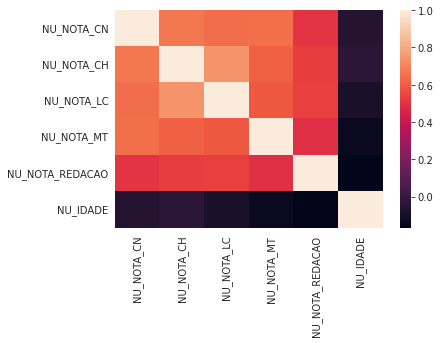

In [57]:
correlacoes_idade = df_idade.corr()
sns.heatmap(correlacoes_idade)

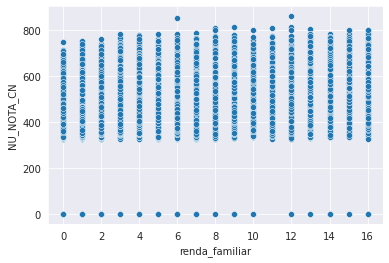

In [58]:
df_renda =df_enem.loc[:, colunas_notas + ['renda_familiar']]
sns.scatterplot(data=df_renda, x='renda_familiar' , y='NU_NOTA_CN')


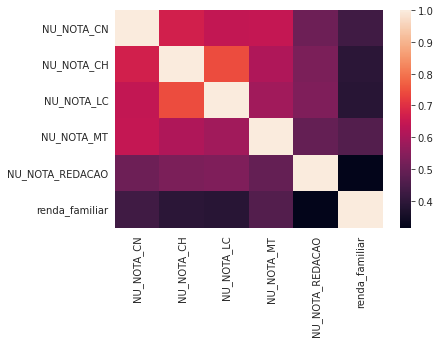

In [59]:
correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)